In [1]:
# Wordclouds authors
!pip install matplotlib
!pip install wordcloud
import pandas as pd
import csv
import matplotlib
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 

In [2]:
with open(r"E:\Helen\FinalProject_INFO5731\done_for_storing\reformatted_bioRxiv.csv", "r",  newline="", encoding='utf-8') as file:
    df= pd.read_csv(file)
df

,Unnamed: 0,paper_id,title,authors_names,affiliations,abstract,text,country
0,0,0015023cc06b5362d332b3baf348d11567ca2fbb,The RNA pseudoknots in foot-and-mouth disease ...,"['Joseph Ward', 'Lidia Lasecka-Dykes', 'Chris ...",[' '],['word count: 194 22 Text word count: 5168 23 ...,"['VP3, and VP0 (which is further processed to ...",NaN
1,1,004f0f8bb66cf446678dc13cf2701feec4f36d76,Healthcare-resource-adjusted vulnerabilities t...,"['Hanchu Zhou', 'Jiannan Yang', 'Kaicheng Tang...",[' '],[],"[""The 2019-nCoV epidemic has spread across Chi...",NaN
2,2,00d16927588fb04d4be0e6b269fc02f0d3c2aa7b,"Real-time, MinION-based, amplicon sequencing f...","['Salman Butt', 'Eric Erwood', 'Jian Zhang', '...","['University of Georgia', 'University of Georg...","[""Infectious bronchitis (IB) causes significan...","['Infectious bronchitis (IB), which is caused ...","['USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA']"
3,3,013d9d1cba8a54d5d3718c229b812d7cf91b6c89,Assessing spread risk of Wuhan novel coronavir...,"['Shengjie Lai', 'Isaac Bogoch', 'Nick Ruktano...","['University of Southampton', 'University of T...",['Background: A novel coronavirus (2019-nCoV) ...,"['In December 2019, a cluster of patients with...",NaN
4,4,01d162d7fae6aaba8e6e60e563ef4c2fca7b0e18,"TWIRLS, an automated topic-wise inference meth...","['Xiaoyang Ji', 'Chunming Zhang', 'Yubo Zhai',...",[' '],['Faced with the current large-scale public he...,['The sudden outbreak of the new coronavirus (...,NaN
...,...,...,...,...,...,...,...,...
798,798,ff6bd29c8ecd325c4edddb2b050d5f4919db6112,Deep sequencing of primary human lung epitheli...,"['Siying Ye', 'Chris Cowled', 'Cheng-Hon Yap',...",[' '],['15 Current prophylactic and therapeutic stra...,['regulates the innate immune response in a cl...,NaN
799,799,ff6c0b549e3f20ec78845f981f19687eece4addf,Increased Neurite Orientation-Dispersion and D...,"['Interleukin-6 ', 'Luis Colon-Perez', 'Kriste...",[' '],['Extracellular β-amyloid (Aβ) plaque deposits...,"[""Excess production and oligomerization of the...",NaN
800,800,ffbd7555a337706238c211197b221795e4e35146,Title: Estimation of COVID-2019 burden and pot...,"['Ashleigh Tuite', 'Isaac Bogoch', 'Ryan Sherb...",[' '],[],['CC-BY-NC-ND 4.0 International license It is ...,NaN
801,801,ffbf8ea9948d73572fd052a74afa01b19e6758a3,Planning horizon affects prophylactic decision...,"['Luis Nardin', 'Craig Miller', 'Benjamin Ride...","['University of Idaho', 'University of Idaho',...","[""Human behavior can change the spread of infe...","['Introduction infected (e.g. wearing a mask, ...","['United States', 'United States', 'United Sta..."


# WORDCLOUD AUTHORS' NAMES

In [3]:
# clean data in authors_names column
df['authors_names']=df['authors_names'].apply(lambda x: " ".join(x for x in str(x).split() if not x.isdigit() and not x.isspace()))
df['authors_names']=df['authors_names'].str.replace('[^\w\s,]','')

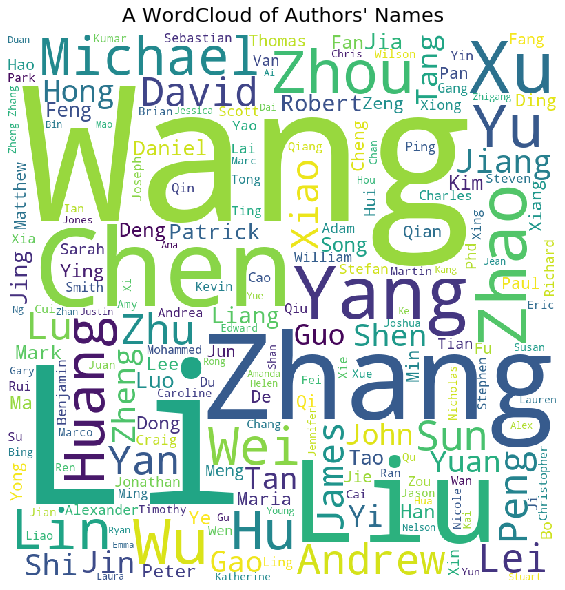

In [4]:
# WORDCLOUD AUTHOR NAMES

stopwords = set(STOPWORDS) 

# create a string of authors' names  
names = ''
for val in df.authors_names:
    names = names +  str(val) 

''' 
# I wonder if which is better? I keep this code here just in case

wordcloud = WordCloud(width = 800, height = 400, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(names) 
  
# plot the wordcloud                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
'''

# set paramaters for the wordcloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(names) 
  
# plot the wordcloud                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
title="A WordCloud of Authors' Names"
plt.title(title, fontdict={'size': 20, 'color': 'black', 'verticalalignment': 'bottom'})
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 


# TOP MOST COMMON NAMES

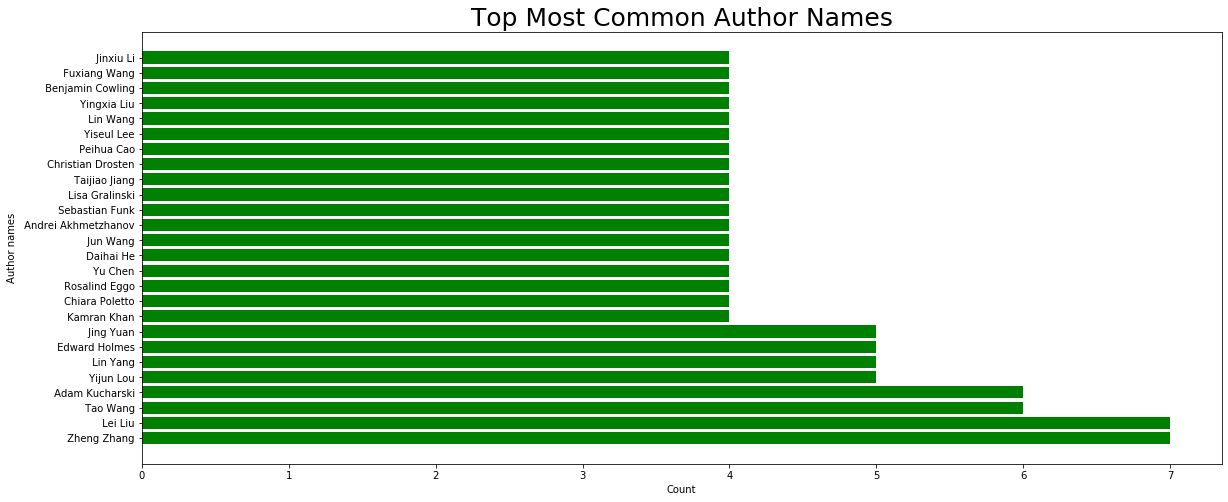

In [5]:
#print(names)
hist=dict()
for name in names.split(','):
    if name !=' ':
        hist[name]=hist.get(name,0)+1
   
    
#print(hist)
auth_name_sorted = {k: v for k, v in sorted(hist.items(), key=lambda item: item[1], reverse=True)} 
#print(auth_name_sorted)
rank_names=pd.DataFrame.from_dict (auth_name_sorted,orient = 'index', columns = ['names']).head(30)


auth_names=[k for k, v in auth_name_sorted.items() if len(k)> 7 and v >3]
frequency =[v for k, v in auth_name_sorted.items() if len(k)> 7 and v >3]

fig = plt.figure(figsize=(15, 6))
ax = fig.add_axes([0,0,1,1])
ax.barh(auth_names,frequency, color="g")
plt.ylabel('Author names')
plt.xlabel('Count')
plt.title('Top Most Common Author Names', fontsize=25)
plt.show()



# WORDCLOUD INSTITUTIONS

In [6]:
# Clean the affiliations column
df['affiliations']=df['affiliations'].apply(lambda x: " ".join(x for x in str(x).split() if not x.isdigit()))
df['affiliations']=df['affiliations'].str.replace('[^\w\s,]','')


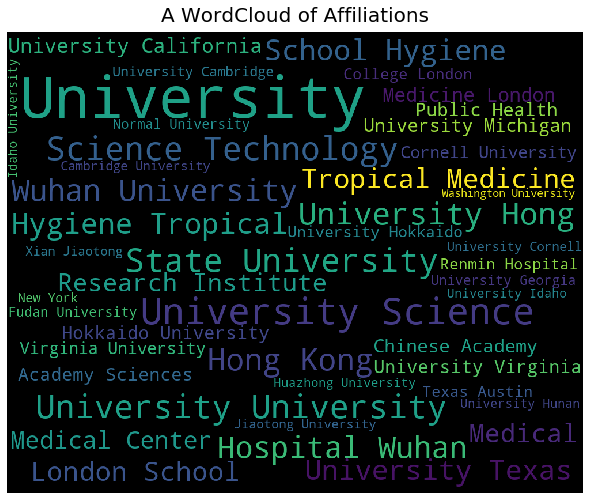

In [7]:
# Create a string of institutions

affiliations= ''
for inst in df['affiliations'].dropna():
    affiliations = affiliations + str(inst) 

# Set up paramaters for the wordcloud
wordcloud = WordCloud(width = 1000, height = 800, 
                background_color ='black', 
                stopwords = stopwords,
                max_words = 45,
                max_font_size = 100,
                min_font_size = 10).generate(affiliations) 
  
# plot the wordcloud                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
title="A WordCloud of Affiliations"
plt.title(title, fontdict={'size': 20, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 


                                                count
 London School of Hygiene  Tropical Medicine       40
 University of Virginia                            28
 Hokkaido University                               24
 University of Cambridge                           22
 University of Science                             21
 Renmin Hospital of Wuhan University               20
 Cornell University                                20
 Chinese Academy of Sciences                       18
 University of Michigan                            18
 University of Idaho                               17
 Shanghai Veterinary Research Institute            17
 Fudan University                                  16
 Huazhong University of Science and Technology     16
 Qingdao University                                14
 University of Newcastle Newcastle NSW 2305        14


Text(0.5, 1.0, 'Top 15 Affiliations')

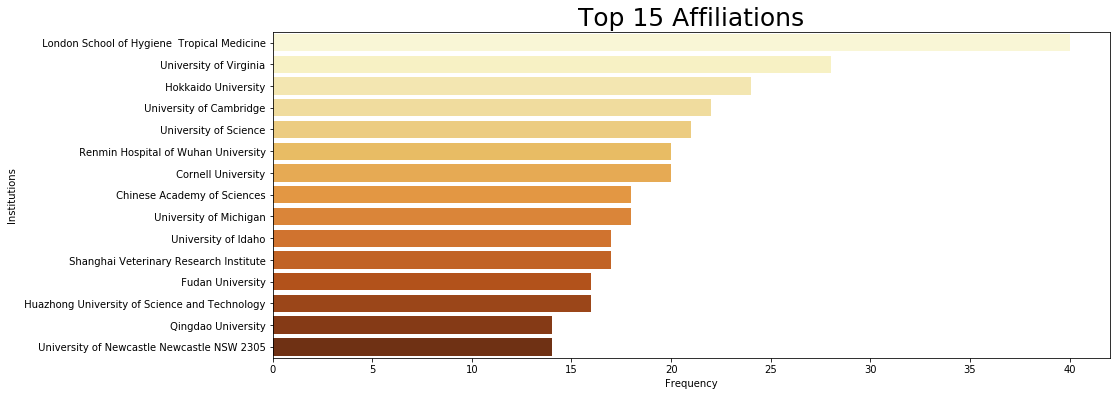

In [8]:
import seaborn as sns
hist=dict()
for inst in affiliations.split(','):
    if inst !=' ':
        hist[inst]=hist.get(inst,0)+1
    
#print(hist)
auth_inst_sorted = {k: v for k, v in sorted(hist.items(), key=lambda item: item[1], reverse=True)} 
rank_affi=pd.DataFrame.from_dict (auth_inst_sorted,orient = 'index', columns = ['count'])
print(rank_affi.head(15))


institutions=[k for k, v in auth_inst_sorted.items() if v >=14]
frequency =[v for k, v in auth_inst_sorted.items() if v >=14]

plt.figure(figsize=(15, 6))
sns.barplot(x= frequency, y = institutions , palette= 'YlOrBr') 
plt.xlabel('Frequency')
plt.ylabel('Institutions')
plt.title("Top 15 Affiliations", fontsize = 25)




# Journals and publishing time

                                count
PLoS One                         2204
Emerg Infect Dis                  941
Sci Rep                           800
PLoS Pathog                       729
Viruses                           638
Virol J                           398
mBio                              330
BMC Infect Dis                    280
Nucleic Acids Res                 274
PLoS Negl Trop Dis                227
Front Immunol                     225
Front Microbiol                   217
PLoS Comput Biol                  215
Nat Commun                        184
BMC Vet Res                       173
BMC Public Health                 168
Emerg Microbes Infect             155
BMJ Open                          153
Influenza Other Respir Viruses    151
PLoS Med                          137


0                                                      NaN
1                                                      NaN
2        The geographic spread of 2019 novel coronaviru...
3        In December 2019, cases of unidentified pneumo...
4                                                      NaN
                               ...                        
29495    <jats:p>This work applies a data-driven coding...
29496    <jats:p>Coronavirus disease (COVID-19) broke o...
29497    <jats:p>The outbreak of COVID-19 epidemic has ...
29498    <jats:p>We analyzed the epidemiological datase...
29499    <jats:p>A novel human coronavirus, now named s...
Name: abstract, Length: 29500, dtype: object

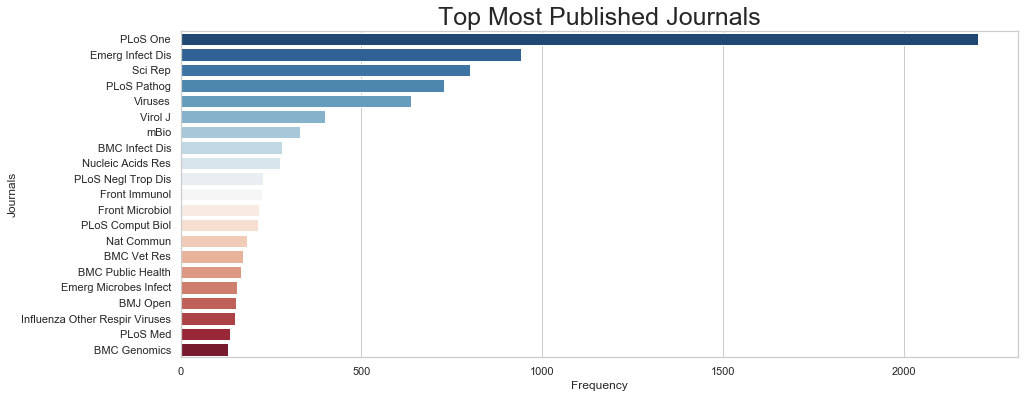

In [95]:
import pandas as pd
import seaborn as sns
with open (r"E:\Helen\FinalProject_INFO5731\datasets_covid19_researchpapers\all_sources_metadata_2020-03-13.csv", 'r', encoding='utf-8') as file:
    data = pd.read_csv(file)
data['publish_time']
data['journal']


hist=dict()
for journal in data['journal'].dropna():
    hist[journal]=hist.get(journal,0)+1
#print(hist)

journals_sorted = {k: v for k, v in sorted(hist.items(), key=lambda item: item[1], reverse=True)} 
journals_ranked=pd.DataFrame.from_dict (journals_sorted,orient = 'index', columns = ['count'])
print(journals_ranked.head(20))

journals=[k for k, v in journals_sorted.items() if v > 130]
count =[v for k, v in journals_sorted.items() if v > 130]


plt.figure(figsize=(15, 6))
sns.barplot(x=count, y = journals , palette= "RdBu_r")
plt.xlabel('Frequency')
plt.ylabel('Journals')
plt.title("Top Most Published Journals", fontsize=25)




      quantity
2019      2503
2018      2291
2020      2047
2017      1911
2016      1740
2015      1619
2014      1368
2013      1093
2012       886
2011       699


Text(0.5, 1.0, 'The Number of Published Papers over Years')

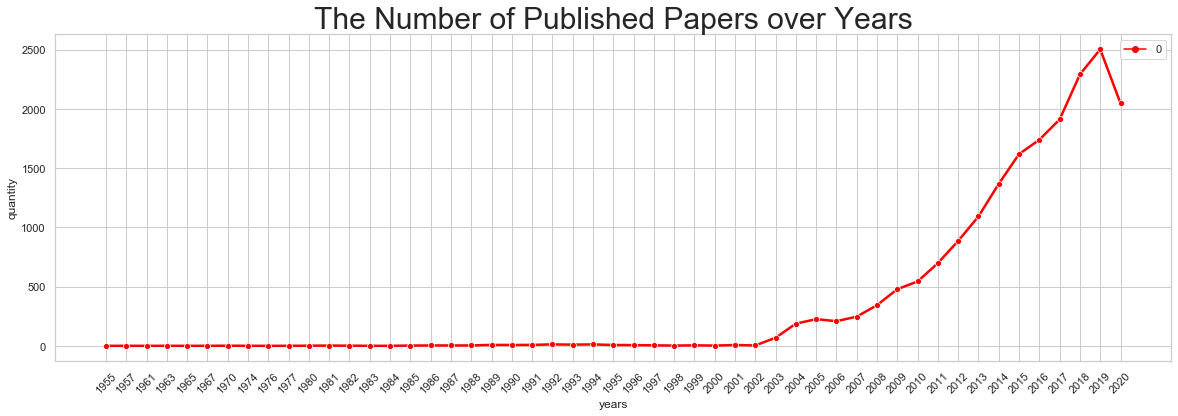

In [10]:
# The number of those paper was published
import re
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

dates=''
for date in data['publish_time'].dropna():
    dates=dates +" "+ str(date)
   
years=re.findall("(19\d{2})", dates)
years.extend(re.findall("(20\d{2})", dates))
    

hist={}
for year in years:
    hist[year]=hist.get(year,0)+1

years_key_sorted = {k: v for k, v in sorted(hist.items(), key=lambda item: item[0])} 
df_years = pd.DataFrame.from_dict (years_key_sorted, orient = 'index')

years_val_sorted = {k: v for k, v in sorted(hist.items(), key=lambda item: item[1], reverse=True)} 
years_ranked=pd.DataFrame.from_dict (years_val_sorted,orient = 'index', columns = ['quantity'])
print(years_ranked.head(10))
plt.figure(figsize=(20, 6))
sns.set(style="whitegrid")
ax = sns.lineplot(hue="coherence", style="choice", palette = ['red'], linewidth=2.5,
                  markers=True, dashes=False,data=df_years)
plt.xticks(rotation=45)
plt.ylabel('quantity')
plt.xlabel('years')
plt.title('The Number of Published Papers over Years', fontsize = 30)

        
    

# Authors' locations - World Map
## Still Working

In [94]:

# Visualize the distribution of authors country on global map
#print(countries)
import string
import re
!pip install folium
import folium

punct=string.punctuation
# Preprocess countries
str_countries = ''


for country in df['country'].dropna():
    str_countries = str_countries + str(country)

#usa_rep= re.findall('USA', str_countries) + re.findall('United States', str_countries)
#print(usa_rep)
countries_rep=re.sub('USA','United States', str_countries)
countries_rep=re.sub('U.S.A','United States', countries_rep)
countries_rep=re.sub('United States of America','United States', countries_rep)
countries_rep=re.sub('The United States','United States', countries_rep)
countries_rep=re.sub('United States\s\d*','United States', countries_rep)
countries_rep=re.sub('UK','United Kingdom', countries_rep)
countries_rep=re.sub('U.K','United Kingdom', countries_rep)
countries_rep=re.sub('P. R. China','China', countries_rep)
countries_rep=re.sub('s Republic ofChina','China', countries_rep)
countries_rep=re.sub('s Republic ofChina People','China', countries_rep)
countries_rep=re.sub(' China','China', countries_rep)
countries_rep=re.sub('PRChina','China', countries_rep)
countries_rep=re.sub('(China\s)', '\'China\'', countries_rep )
countries_rep=re.sub("People's Republic of China",'China', countries_rep)
countries_rep=re.sub("PR China",'China', countries_rep)
countries_rep=re.sub("Brasil Brasília, Brazil",'Brazil', countries_rep)
countries_rep=re.sub("[^\w\s\']",'', countries_rep )


#print(countries_rep)
items=[]
hist={}
list_removing = ['address', 'Zheng', 'Chen', 'People', 'Kingdom']
for item in countries_rep.split("'"):
    if re.match('(China\s)', item):
        for item in item.split():
            if item =='China':
                hist[item]=hist.get(item,0)+1
    if re.match('(Japan\s)', item):
        for item in item.split():
            if item =='Japan':
                hist[item]=hist.get(item,0)+1
    if re.match('(States\s)', item):
        for item in item.split():
            if item =='United States':
                hist[item]=hist.get(item,0)+1
    if re.match('(Israel\s)', item):
        for item in item.split():
            if item =='Israel':
                hist[item]=hist.get(item,0)+1
    if re.match('(United Kingdom\s)', item):
        for item in item.split():
            if item =='United Kingdom':
                hist[item]=hist.get(item,0)+1
    if item !='' and item !=' ' and item not in list_removing:
        #items.append(item)
        hist[item]=hist.get(item,0)+1
print(hist)
    
#print(items)  

country_key_sorted = {k: v for k, v in sorted(hist.items(), key=lambda item: item[1], reverse=True)} 
df_country = pd.DataFrame.from_dict (country_key_sorted, orient = 'index')
df_country

the_map = folium.Map(tiles="cartodbpositron")
the_map.choropleth(
    geo_data=country_shapes,
    name='choropleth',
    data=df_country,
    key_on='feature.id',
    fill_color='Blues',
    nan_fill_color='white',
    fill_opacity=0.7,
    line_opacity=0.2,
)
the_map

{'United States': 395, 'United Kingdom': 170, 'Portugal': 20, 'France': 43, 'China': 395, 'Argentina': 2, 'Canada': 42, 'India': 4, 'Switzerland': 25, 'Sweden': 34, 'The Netherlands': 12, 'Hungary': 9, 'United States United States': 4, 'Finland': 7, 'Norway': 20, 'Republic of Korea': 34, 'Estonia': 3, 'Latvia': 1, 'Lithuania': 1, 'Austria': 1, 'Japan': 51, 'Greece': 2, 'Italy': 19, 'Singapore': 1, 'Spain': 10, 'Germany': 45, 'Brazil': 11, 'Israel': 10, 'PRChina': 3, 'Poland': 12, 'Uruguay': 5, 'Australia': 48, 's Republic ofChina People': 18, 's Republic ofChina': 4, 'Cuba': 1, 'Congo': 2, 'Trento Italy': 2, 'Turkey': 4, 'Pakistan': 3, ' People': 1, 'South Africa': 4, 'Tunisia': 4, 'Ireland': 2, 'ChinaChina': 14, 'Bangladesh': 5, 'Sudan': 16, 'Iran': 1, 'Republic': 1, 'Slovenia': 1, 'Cyprus': 2, '4 Canada': 3, 'Kenya': 7, 'Belgium': 10, 'Democratic Republic of Congo': 4, 'Republic of Singapore': 5, 'ChinaAustralia China': 4, 'United States 12': 1, '6 Canada': 1, 'Jln Dato': 6, 'Ukraine

NameError: name 'country_shapes' is not defined

{'': 13, 'China': 14}


# EXTRACT KEYWORDS FROM ABSTRACT
## Still Working

In [18]:
# clean data in 'abstract' column
df['abstract']=df['abstract'].apply(lambda x: " ".join(x for x in str(x).split() if not x.isdigit() and not x.isspace()))
df['abstract']=df['abstract'].str.replace('[^\w\s,]','')
df['abstract']=df['abstract'].str.lower()
df['abstract']

0      word count text word count authorfunder all ri...
1                                                       
2      infectious bronchitis ib causes significant ec...
3      background a novel coronavirus 2019ncov emerge...
4      faced with the current largescale public healt...
                             ...                        
798    15 current prophylactic and therapeutic strate...
799    extracellular βamyloid aβ plaque deposits and ...
800                                                     
801    human behavior can change the spread of infect...
802    coronaviruses such as the newly discovered vir...
Name: abstract, Length: 803, dtype: object

In [35]:
!pip install rake-nltk
from rake_nltk import Metric, Rake
from nltk.corpus import stopwords
import string



In [41]:
from __future__ import absolute_import
from __future__ import print_function
import six

from rake_nltk import rake
import operator
import io

In [ ]:


abstract_txt= ''
for abstr in df['abstract']:
    abstract_txt= abstract_txt + str(abstr)
abstract_txt=" ".join(x for x in abstract_txt.split() if not x.isdigit())
#print(abstract_txt)

punct=string.punctuation
stop=stopwords.words('english')

rake_object= rake.Rake(stop, 5, 3, 4)
keywords = rake_object.run(abstract_txt)
print ("Keywords:", keywords)


In [ ]:
print(len(stop))
stop_plus='the, and, of, a, in, is, for, to, we, this, are, with, as, on, it, an, that, which, by, using, can, paper, from, be, based, has, was, have, or, at, such, also, but, results, proposed, show, new, these, used, however, our, were, when, one, not, two, study, present, its, sub, both, then, been, they, all, presented, if, each, approach, where, may, some, more, use, between, into, 1, under, while, over, many, through, addition, well, first, will, there, propose, than, their, 2, most, sup, developed, particular, provides, including, other, how, without, during, article, application, only, called, what, since, order, experimental, any'
stop_txt = []
for w in stop_plus.split(','):
    stop_txt.append(w)
stop_words=stop_txt+stop
print(len(stop_words))
print(len(set(stop_words)))


